###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/train_data_900.csv', encoding='unicode_escape')

In [ ]:
dataset.shape

(7920, 3)

In [ ]:
dataset.head(20)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [ ]:
dataset.columns

Index(['id', 'label', 'tweet'], dtype='object')

Preprocessing the Dataset

###Data Cleaning

In [ ]:
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for word in r:
    input_txt = re.sub(word, "", input_txt)
  return input_txt

In [ ]:
dataset['clean_tweet'] = np.vectorize(remove_pattern)(dataset['tweet'], "@[\w]*")

In [ ]:
dataset['clean_tweet'] = dataset['clean_tweet'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

In [ ]:
dataset.head(20)

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps ...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...,New Type C charger cable #UK â¦ #bay #Amazo...
8,9,0,Bout to go shopping again listening to music #...,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...,Photo: #fun #selfie #pool #water #sony #camera...


In [ ]:
# remove special characters, numbers and punctuations
dataset['clean_tweet'] = dataset['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
dataset.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps ...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,We love this Would you go #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


In [ ]:
# remove short words
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
dataset.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps #b...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...


###Tokenization of clean tweets

Individual words separated as tokens to facilitate further processing as strings



In [ ]:
# individual words considered as tokens
tokenized_tweet = dataset['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [#fingerprint, #Pregnancy, Test, #android, #ap...
1    [Finally, transparant, silicon, case, Thanks, ...
2    [love, this, Would, #talk, #makememories, #unp...
3    [wired, know, George, made, that, #iphone, #cu...
4    [What, amazing, service, Apple, even, talk, ab...
Name: clean_tweet, dtype: object

###Stemming

Stemmer.stem() converts certain words into its simpler version.

In [ ]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()


0    [#fingerprint, #pregnanc, test, #android, #app...
1    [final, transpar, silicon, case, thank, uncl, ...
2    [love, thi, would, #talk, #makememori, #unplug...
3    [wire, know, georg, made, that, #iphon, #cute,...
4    [what, amaz, servic, appl, even, talk, about, ...
Name: clean_tweet, dtype: object

In [ ]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
dataset['clean_tweet'] = tokenized_tweet
dataset.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnanc test #android #app #bea...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl #yay #s...
2,3,0,We love this! Would you go? #talk #makememorie...,love thi would #talk #makememori #unplug #rela...
3,4,0,I'm wired I know I'm George I was made that wa...,wire know georg made that #iphon #cute #davent...
4,5,1,What amazing service! Apple won't even talk to...,what amaz servic appl even talk about question...


###Exploratory Data Analysis

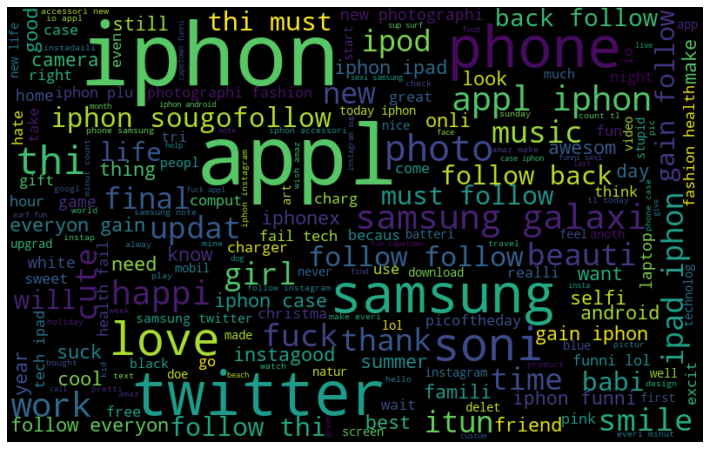

In [ ]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in dataset['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

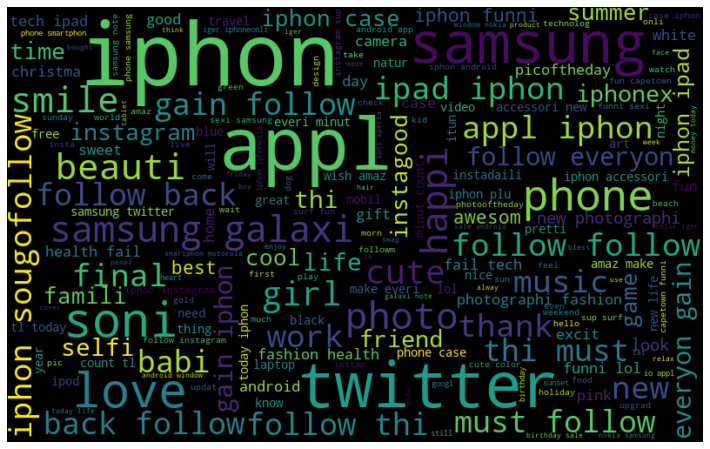

In [ ]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in dataset['clean_tweet'][dataset['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

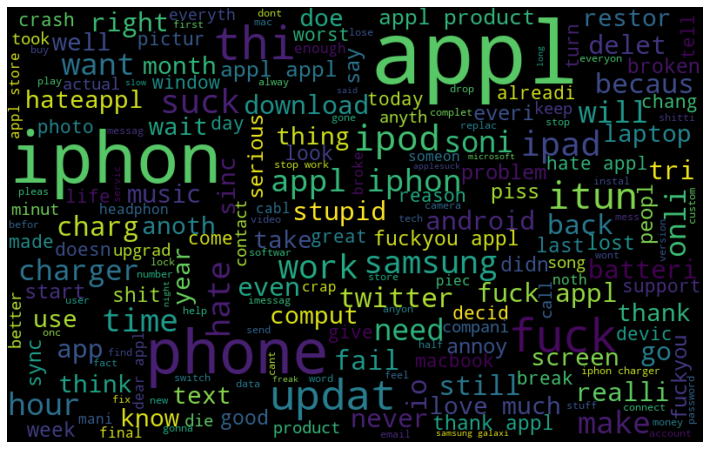

In [ ]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in dataset['clean_tweet'][dataset['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Extracting hashtags
#Extraction of all hashtag content in the tweets, returning a list of hashtags.

def hashtag_extract(tweets):
  hashtags = []
  for tweet in tweets:
    ht = re.findall(r"#(\w+)", tweet)
    hashtags.append(ht)
  return hashtags

In [ ]:
#Extraction of hashtags from positive tweets

ht_positive = hashtag_extract(dataset['clean_tweet'][dataset['label']==0])


In [ ]:
#Extraction of hashtags from negative tweets

ht_negative = hashtag_extract(dataset['clean_tweet'][dataset['label']==1])


In [ ]:
ht_positive

[['fingerprint',
  'pregnanc',
  'android',
  'app',
  'beauti',
  'cute',
  'health',
  'iger',
  'iphoneonli',
  'iphonesia',
  'iphon'],
 ['yay', 'soni', 'xperia', 'sonyexperia'],
 ['talk',
  'makememori',
  'unplug',
  'relax',
  'iphon',
  'smartphon',
  'wifi',
  'connect'],
 ['iphon', 'cute', 'daventri', 'home'],
 ['instap', 'instadaili', 'soni', 'xperia', 'xperiaz'],
 ['bay',
  'amazon',
  'etsi',
  'rob',
  'tobi',
  'evemun',
  'mcmafia',
  'taylor',
  'spectr',
  'newyear',
  'start',
  'recip',
  'technolog',
  'samsunggalaxi',
  'iphonex'],
 ['iphon', 'justm', 'music', 'likeforlik', 'followforfollow'],
 ['fun',
  'selfi',
  'pool',
  'water',
  'soni',
  'camera',
  'picoftheday',
  'sun',
  'instagood',
  'boy',
  'cute',
  'outdoor'],
 ['ipad', 'appl', 'shop'],
 ['deepellum',
  'downtown',
  'dalla',
  'bigd',
  'saturday',
  'soni',
  'summer',
  'urban'],
 ['iphon'],
 ['iphonesia', 'iphon', 'instagood', 'instagram', 'photooftheday', 'tweegram'],
 ['appl', 'art', 'easte

In [ ]:
ht_negative

[[],
 [],
 ['appl'],
 ['drinkyourhaterad'],
 ['cellcom', 'depress', 'idontwantto'],
 ['hateorang'],
 ['iphon',
  'suck',
  'appl',
  'truth',
  'truthbetold',
  'agre',
  'fact',
  'realitycheck',
  'blackberryp'],
 ['fuckingpiss'],
 [],
 ['appl'],
 ['myloss', 'appl'],
 ['soangri', 'hateappl'],
 ['appl', 'itun'],
 [],
 ['iphon', 'appl'],
 [],
 [],
 [],
 [],
 ['sorri'],
 ['appl'],
 ['tech'],
 ['win', 'getalif', 'appl', 'tecshit'],
 ['fuckyou', 'appl', 'anotherangrycustom'],
 [],
 ['appl',
  'hater',
  'yousuck',
  'briantong',
  'easytotalk',
  'producesometh',
  'korean',
  'loser'],
 ['soni'],
 ['appl', 'io'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['yosemit', 'appl', 'updat'],
 ['fuckyou', 'soni'],
 ['sodepress', 'samsunggalaxyftw', 'loljk'],
 ['appl', 'usefuckingtorr'],
 ['appl', 'iphon'],
 ['samsung'],
 ['appl'],
 [],
 ['getbetterbatteri'],
 ['geniusbar', 'appl', 'customercar', 'batteri'],
 ['shitbird', 'colbertreport', 'appl', 'iwatch'],
 ['appl', 'iphon'],
 [],
 ['iphon', 'appl'],
 [],
 

In [ ]:
# unnest list
#Filtering and cleaning the words in the sentence for a better visualization and processing
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])


In [ ]:
ht_negative[:5]

['appl', 'drinkyourhaterad', 'cellcom', 'depress', 'idontwantto']

In [ ]:
ht_positive[:5]

['fingerprint', 'pregnanc', 'android', 'app', 'beauti']

In [ ]:
#Conversion of the dictionary into a dataframe to list positive hashtags with count
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()


,Hashtag,Count
0,fingerprint,4
1,pregnanc,1
2,android,335
3,app,198
4,beauti,286


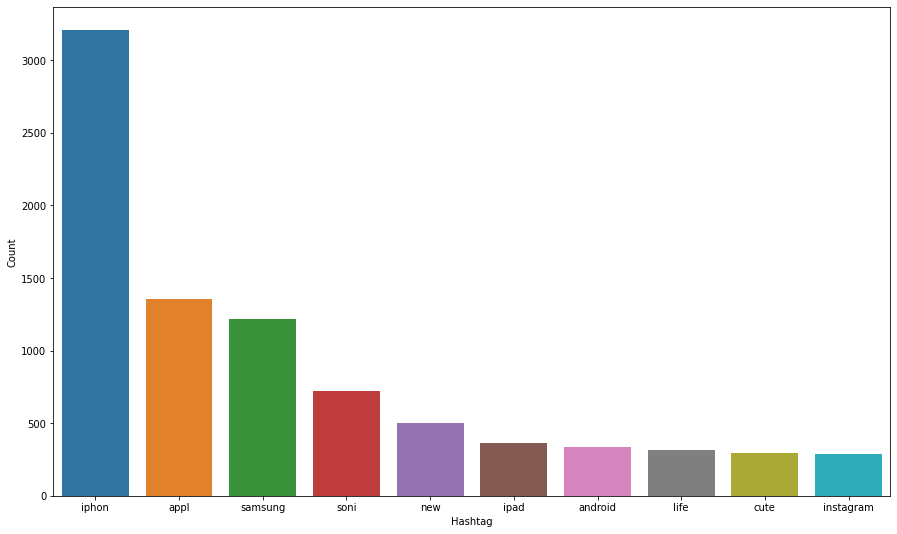

In [ ]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [ ]:
freq = nltk.FreqDist(ht_negative)
dn = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
dn.head()


,Hashtag,Count
0,appl,794
1,drinkyourhaterad,1
2,cellcom,1
3,depress,2
4,idontwantto,1


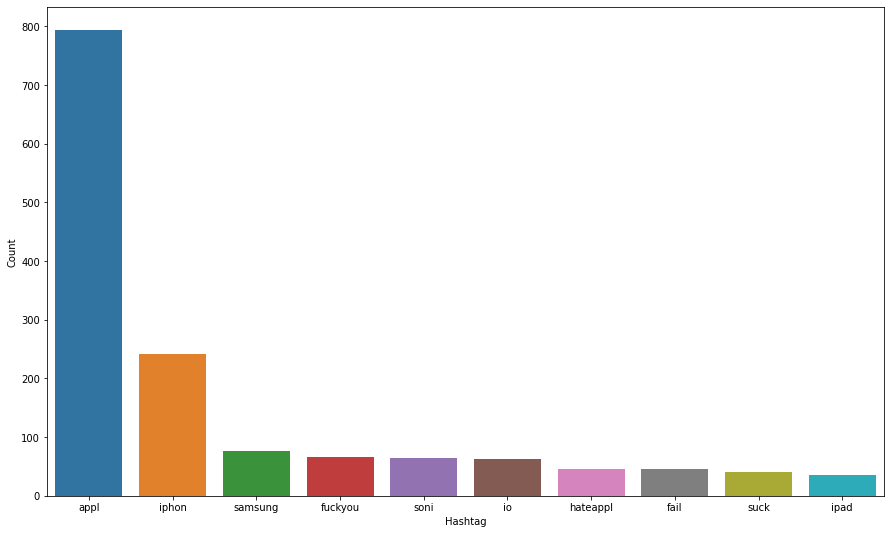

In [ ]:
# select top 10 hashtags
dn = dn.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=dn, x='Hashtag', y='Count')
plt.show()

In [ ]:
dataset.head()

,id,label,tweet,clean_tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnanc test #android #app #bea...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl #yay #s...
2,3,0,We love this! Would you go? #talk #makememorie...,love thi would #talk #makememori #unplug #rela...
3,4,0,I'm wired I know I'm George I was made that wa...,wire know georg made that #iphon #cute #davent...
4,5,1,What amazing service! Apple won't even talk to...,what amaz servic appl even talk about question...


###Data Transformation and Input Splitting

In [ ]:
#Extraction of the data into vectors for training and testing


from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [ ]:
bow = bow_vectorizer.fit_transform(dataset['clean_tweet'])
bow[0]


<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = '/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/BoW_Sentiment_Model.pkl'
pickle.dump(bow_vectorizer, open(bow_path, "wb"))

In [ ]:
words = bow_vectorizer.get_feature_names()
pickle.dump(words,open('/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/vocabulary.pkl','wb'))

In [ ]:
#Splitting the data for training and testing with test size of 25%

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, dataset['label'], random_state=42, test_size=0.25)

###Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

#f1_score() and accuracy_score() gives the performance metrics of the model for the test data.

In [ ]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# Exporting LogisticRegression model to later use in prediction
import joblib
joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/Sentiment_Model.pkl') 

['/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/Sentiment_Model.pkl']

In [ ]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.7633885102239533

In [ ]:
accuracy_score(y_test,pred)

0.8772727272727273

In [ ]:
dataset.columns

Index(['id', 'label', 'tweet', 'clean_tweet'], dtype='object')